# Neural network models

## Nececary imports

In [2]:
from ipynb.fs.full.Utils import load_dataset, scale_data, split_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/home/ivan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

## Loading the data

In [23]:
x_train, x_test, y_train, y_test = load_dataset()
number_of_classes = len(y_train.unique())
print("classes: ", number_of_classes)

classes:  14


In [24]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## Creating the network

In [25]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [26]:
model = Sequential()

In [27]:
model.add(Dense(units = 60, input_dim = number_of_features, activation = 'relu'))

In [28]:
model.add(Dense(units=30, activation='relu'))

In [29]:
model.add(Dense(units = output_size, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 14)                434       
Total params: 3,764
Trainable params: 3,764
Non-trainable params: 0
_________________________________________________________________


## Training the network

In [32]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=3)])

In [33]:
epochs = history.epoch

## Model characteristics

In [42]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

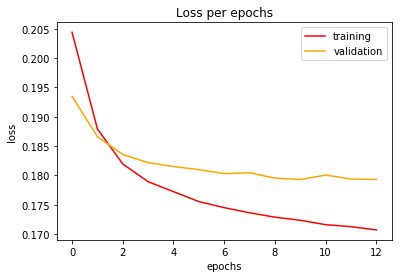

In [43]:
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [44]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

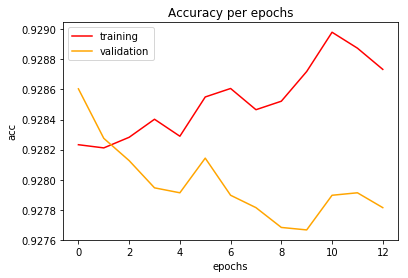

In [47]:
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

## Evaluation

In [46]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

6196/6196 [==============================] - 4s 685us/step
Test loss: 0.17883535377859222, test accuracy: 0.927868136673146


In [28]:
#model.fit(x_train, y_train, epochs=7, batch_size=32)

In [29]:
print(x_test[1:2])
print(y_test[1:2])

[[ 1.11666589 -0.92413371 -0.64428851  0.75118027  0.68599003  0.85459788
   1.71560684 -0.70843557  0.10757245 -0.94814042 -1.04489914  0.2275636
   2.98818645 -0.25917859 -0.28428223 -0.36016372 -0.34465876 -0.34176286
  -0.18591447 -0.28640843 -0.29494488 -0.26008923 -0.36065376 -0.2706916 ]]
      chill  classical  country  hiphop  indie_alt  jazz  latin  metal  party  \
1174      1          0        0       0          0     0      0      0      0   

      pop  punk  rnb  rock  workout  
1174    0     0    0     0        0  


In [30]:
model.predict(x_test[1:2])

array([[3.3125311e-01, 3.6363572e-01, 4.7799604e-05, 2.7318144e-01,
        8.0704447e-03, 1.4980188e-02, 4.6473401e-04, 3.2341562e-05,
        8.5269765e-04, 1.1994315e-03, 1.5881612e-04, 5.3221914e-03,
        5.7543372e-04, 2.2571236e-04]], dtype=float32)

In [31]:
# model je ispravno pogodio?

In [33]:
model.save("classifier.h5")

In [35]:
x[1:2]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
1,0.687,0.75,-4.537,1,0.0965,0.107,0.000003,0.161,0.911,98.987,...,1,0,0,0,0,0,0,0,0,0
